In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [2]:
data = pd.read_csv('Dataset/abalone.csv')

In [3]:
data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [4]:
data["Sex"] = data["Sex"].replace (["F", "M" , "I"], [0,1,2])

In [5]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [6]:
X = np.array(data["Length"])
Y = np.array(data["Height"])
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
X.shape

(4177, 1)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape)

W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), Y_train)
W

(3132, 1)


array([[0.26742549]])

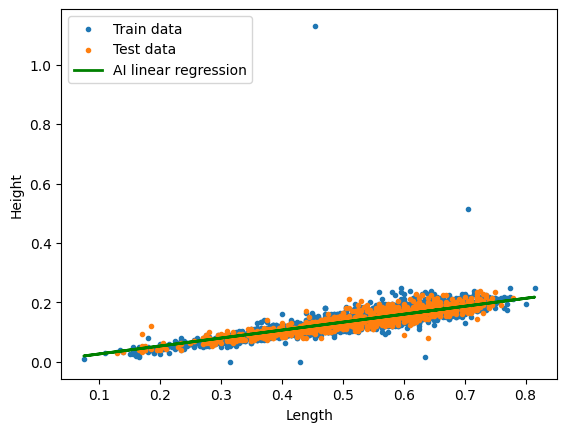

In [8]:
plt.scatter(X_train, Y_train, marker='.')
plt.scatter(X_test, Y_test, marker='.')
plt.plot(X_train,W * X_train, color='green', lw=2)

plt.xlabel("Length")
plt.ylabel("Height")
plt.legend(["Train data", "Test data", "AI linear regression"], loc="upper left")
plt.show()

In [9]:
# predict

x_test = 0.49 # length
y_pred = W * x_test
print("height:", y_pred)

height: [[0.13103849]]
